
### Merging and saving all the data


In [2]:
import pandas as pd 
import os 

files = [file for file in os.listdir('Sales_Data')]  #agrouping multfiles in one variable

all_months = pd.DataFrame()

  
for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    all_months = pd.concat([all_months, df])  #merging the empty dataframe with the                                                   #readed data of the files in df


all_months.to_csv("all_data.csv",index=False)  #saving a csv with all data


In [3]:
all_data = pd.read_csv('all_data.csv')


nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')


### Finding and cleaning the 'or' data in the order column 

In [4]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


### Add month column and cleaning the data



### Convert columns to type number

In [5]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Add Columns of Month


In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int64')


### Add column of sale 

In [7]:
all_data["Sales"] = all_data['Quantity Ordered']*all_data['Price Each']

### Question: what was the best month for sale? How much was earned that month?

In [8]:
results = all_data.groupby(all_data['Month']).sum()
results


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


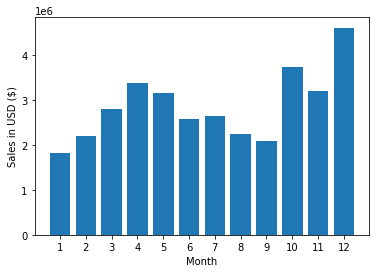

In [9]:
import matplotlib.pyplot as plt 

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()


### Add a city column

In [10]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({get_state(x)})" )
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### What city has the highest sale? 

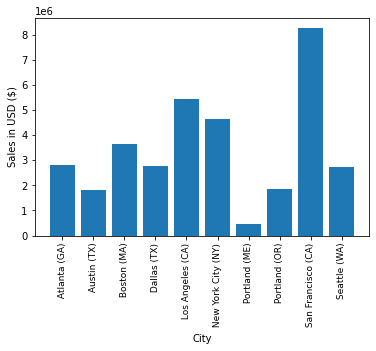

In [11]:
import matplotlib.pyplot as plt

city_results = all_data.groupby('City').sum()

cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities,city_results['Sales'])
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.xticks(cities, rotation='vertical', size=9)
plt.show()

### What time should disponibilize the advertisements to maximize the likelihood of costumers buying the product?

In [12]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hours'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hours,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


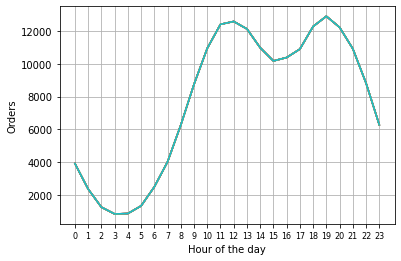

In [13]:
hours = [hour for hour, df in all_data.groupby('Hours')]

plt.plot(hours, all_data.groupby(['Hours']).count())
plt.ylabel('Orders')
plt.xlabel('Hour of the day')
plt.xticks(hours, size=8)
plt.grid()

all_data.groupby(['Hours']).count()


### What products are most often sold together?

In [14]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x) )
df = df[['Order ID', 'Grouped']].drop_duplicates()



<ipython-input-14-bc08f9a38e05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x) )


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
     print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? And why do you think it sold the most?

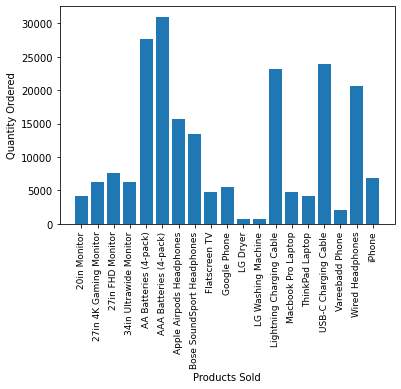

In [32]:
product_column = all_data.groupby('Product')
quantity_ordered = product.sum()['Quantity Ordered']

products = [products for products, df in product_column]
plt.bar(products, quantity_ordered)
plt.xticks(products,rotation="vertical", size=9)
plt.xlabel('Products Sold')
plt.ylabel('Quantity Ordered')
plt.show()

"""The most sold is the batteries and charging cable, maybe because its cheap and get over of the usabillity fast"""

<ipython-input-37-6a5ebf592a5d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=9 )


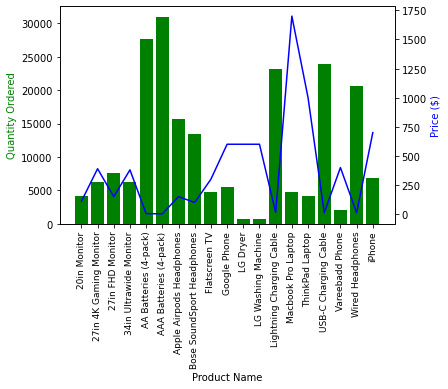

In [37]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=9 )
plt.show()